# Project: Investigate a Dataset (tmdb-movies.csv)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Dataset selected for the analysis 'tmdb-movies.csv'<br>
<br>
The data contains various parameters id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj<br>
<br>
Based on the information available, I am addressing the following questions.<br>

1) Which moves made highest profit, highest loss?<br>
2) Which movies have been made with Highest And Lowest Budget?<br>
3) What is the average runtime of the movie each year?<br>
4) What is the total vote counts each year?<br>
5) What is Average vote rating each year?<br>
6) How does the profit depends on Popularity, Budget, Runtime and Vote avarage?<br>
7) Which Genre has the highest movies?<br>


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [120]:
#reading the tmdb-movies.csv file in printing the first line
df=pd.read_csv('tmdb-movies.csv',sep=',',header=0)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [121]:
#printing all the colums headers
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Observations:
<ba>
- There are 10865 rows and 21 colums.
<ba>
- There are null values in the data

In [123]:
#drop the colums that are not required for the current analysis. For the current analysis, 
#I do not the data 'id','imdb_id','cast','homepage','director','tagline','keywords','overview','production_companies'

df.drop(['id','imdb_id','cast','homepage','director','tagline','keywords','overview','production_companies'], axis=1, inplace=True)

In [124]:
#checking the column headers after removing the colums that are not required
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [125]:
#checking the info after removing the colums that are not required
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 891.4+ KB


In [126]:
#checking for duplicated colums
df.duplicated().sum()

1

In [127]:
#removing the duplicates and confirming there are no further duplicates
df.drop_duplicates(inplace=True);
df.duplicated().sum()

0

In [128]:
#checking for null values in the data set
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [129]:
#As I will be working with the column'genres', I am removing all the colums with 'geners' has null values and confirming
#there are no null values in the data set
df.dropna(subset=['genres'],inplace=True)
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [130]:
#checking descriptive statistics of the data set
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [131]:
# It is not poractically possible to have movies with runtime =0,so all the comuns with runtime =0 are removed.
# It is not poractically possible to have movies with budget =0. Looking at the statistics the max budget is 4.25e8,
#so I am capping the budget to 1,00,000 (which is 0.023% of max budget), so all the comuns with budget < 10000 are removed.
# It is unlikely to have movies with revenue =0,so all the comuns with revnue =0 are removed.

# getting the count of colums with runtime =0, budget < 10000, revnue =0 and printing the same
less_budget_count = (df['budget'].values < 100000).sum()
zero_revenue_count = (df['revenue'].values == 0).sum()
zero_runtime_count = (df['runtime'].values == 0).sum()

print('less_budget_count =',less_budget_count,',  zero_revenue_count = ',zero_revenue_count,',  zero_runtime_count = ',zero_runtime_count)

less_budget_count = 5793 ,  zero_revenue_count =  5993 ,  zero_runtime_count =  30


In [132]:
#removing all the colums with runtime =0, budget < 10000, revnue =0 and re indexing the data set

df = df[(df[['revenue','runtime']] != 0).all(axis=1)]
df = df[(df[['budget']] >= 100000).all(axis=1)]

df.reset_index(drop=False, inplace=True)

In [133]:
#checking descriptive statistics of the data set and looks for the analysis.
#Note: the min value in the 'revenue' is 2, which is unlikely, but I am still considering this for the analysis, assuming that
#the movie has probably made a loss
df.describe()

,index,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3812.000000,3812.000000,3.812000e+03,3.812000e+03,3812.000000,3812.000000,3812.000000,3812.000000,3.812000e+03,3.812000e+03
mean,5502.676548,1.199807,3.761341e+07,1.087022e+08,109.347324,532.177335,6.167733,2001.275708,4.472712e+07,1.383085e+08
std,3028.686243,1.480717,4.225826e+07,1.771656e+08,19.868487,883.579001,0.795390,11.279601,4.481314e+07,2.168533e+08
min,0.000000,0.001117,1.000000e+05,2.000000e+00,26.000000,10.000000,2.200000,1960.000000,9.199996e+04,2.370705e+00
25%,2904.750000,0.467197,1.000000e+07,1.421503e+07,96.000000,72.750000,5.700000,1995.000000,1.354637e+07,1.910216e+07
50%,5501.500000,0.803622,2.500000e+07,4.594235e+07,106.000000,206.000000,6.200000,2004.000000,3.038360e+07,6.249016e+07
75%,8130.500000,1.385810,5.000000e+07,1.255494e+08,119.000000,583.000000,6.700000,2010.000000,6.079775e+07,1.648108e+08
max,10848.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [134]:
df.head()

,index,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [135]:
# checking the info, no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 13 columns):
index             3812 non-null int64
popularity        3812 non-null float64
budget            3812 non-null int64
revenue           3812 non-null int64
original_title    3812 non-null object
runtime           3812 non-null int64
genres            3812 non-null object
release_date      3812 non-null object
vote_count        3812 non-null int64
vote_average      3812 non-null float64
release_year      3812 non-null int64
budget_adj        3812 non-null float64
revenue_adj       3812 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 342.5+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which moves made highest profit, highest loss?

In [136]:
#profit/loss is calculated as revenue - budget

df['profit_loss'] = df['revenue'] - df['budget']

# printing the first row to see the column 'profit_loss'

df.head(1)

,index,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_loss
0,0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810


In [137]:
# Function to make a bar plot
#Arrugemnts are,
#plot_name -- Name of the plot
#x_data -- X axis values
#y_data -- Y axis values
#plot_title -- Title of the plot
#plot_xlabel -- X axis label
#plot_ylabel -- Y axis label
#plot_style -- darkgrid, whitegrid, dark, white, and ticks
#figsize_w -- width of the figure
#figsize_h -- height of the figure
#title_font_size -- font size of the title
#xlabel_font_size -- font size of the X-axis label
#ylabel_font_size -- font size of the Y-axis label

def plot_fun(plot_name,x_data,y_data,plot_title,plot_xlabel,plot_ylabel,\
             plot_style,figsize_w,figsize_h,title_font_size,xlabel_font_size,ylabel_font_size):
     
    plot_name=sns.barplot(x=x_data,y=y_data)
    sns.set(rc={'figure.figsize':(figsize_w,figsize_h)})
    plot_name.set_title(plot_title,fontsize = title_font_size)
    plot_name.set_xlabel(plot_xlabel,fontsize = xlabel_font_size)
    plot_name.set_ylabel(plot_ylabel,fontsize = ylabel_font_size)
    sns.set_style(plot_style)

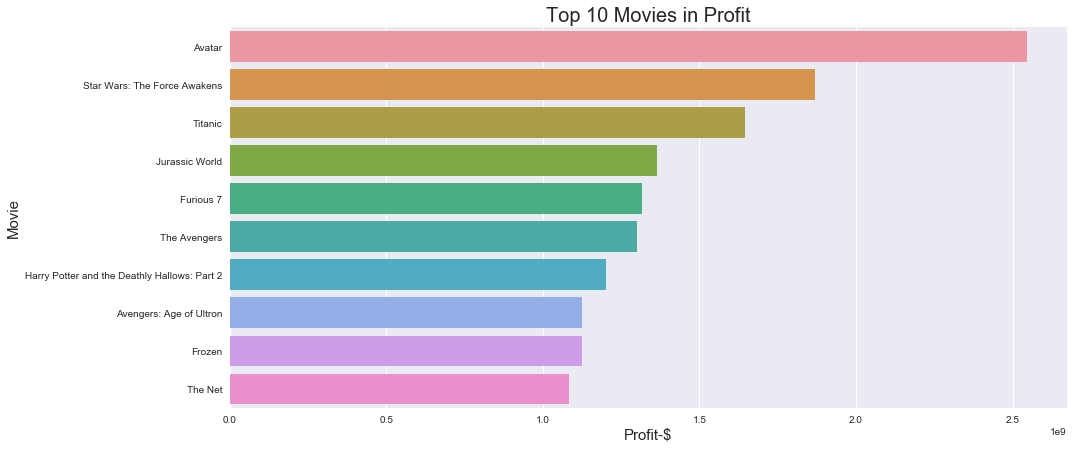

In [148]:
# sorting the data in the descending order of the 'profit_loss' column and selecting the first 10
df2 = df.sort_values(by='profit_loss',ascending=False)[:10]

#taking the information for plotting
value_x= df2['profit_loss']
value_y= df2['original_title']

# calling the function 'plot_fun' to make a bar plot
plot_fun(profit_movies_plot1,value_x,value_y,'Top 10 Movies in Profit','Profit-$','Movie','ticks',15,7,20,15,15)

#### Findings from the plot: From the above bar plaot, we can see the top 10 movies which made profit and the movie 'Avatar' has made highest profit of 2.54e9

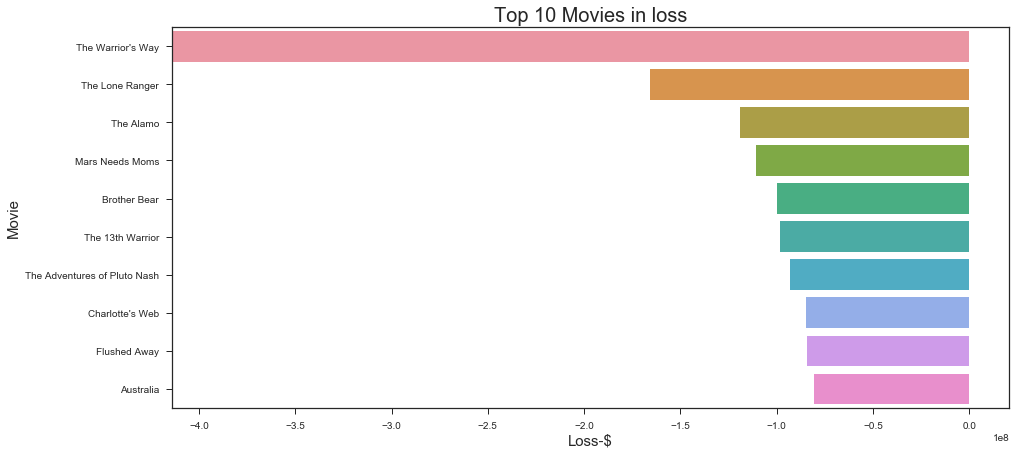

In [139]:
# sorting the data in the ascending order of the 'profit_loss' column and selecting the first 10
df3 = df.sort_values(by='profit_loss',ascending=True)[:10]

#taking the information for plotting
value_x = df3['profit_loss']
value_y = df3['original_title']

# calling the function 'plot_fun' to make a bar plot
plot_fun(profit_movies_plot2,value_x,value_y,'Top 10 Movies in loss','Loss-$','Movie','ticks',-15,7,20,15,15)

#### Findings from the plot: From the above bar plot, we can see the top 10 movies which made loss and the movie 'The warroiors way' has made highest loss of -4.13e8

### Research Question 2: Which movies have been made with Highest And Lowest Budget?

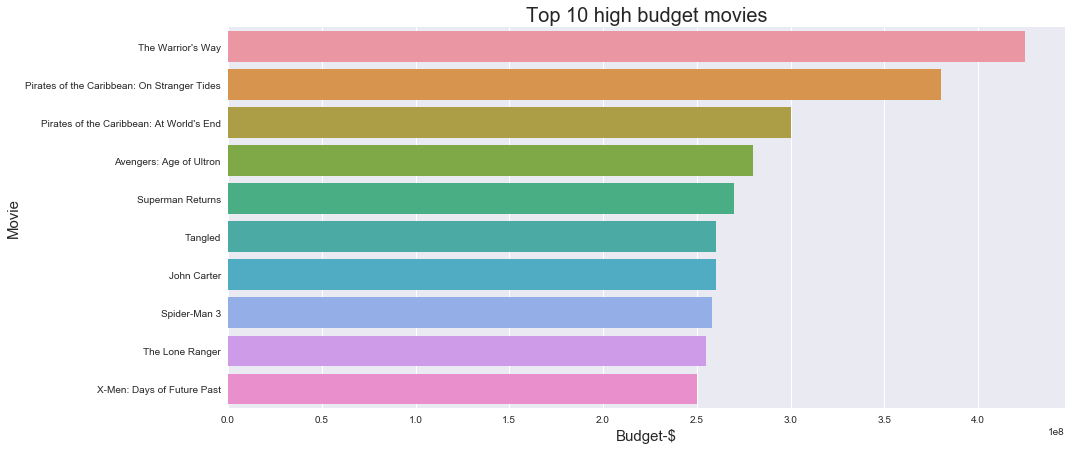

In [147]:
# sorting the data in the descending order of the 'budget' column and selecting the first 10
df4 = df.sort_values(by='budget',ascending=False)[:10]

# taking the information for plotting
value_x = df4['budget']
value_y = df4['original_title']

# calling the function 'plot_fun' to make a bar plot
plot_fun(high_budget_movies_plot1,value_x,value_y,'Top 10 high budget movies','Budget-$','Movie','darkgrid',15,7,20,15,15)

#### Findings from the plot: From the above point plot, we can see the top 10 movies which are made with high budget and the movie 'The warroiors way' is made highest budget of 4.25e8

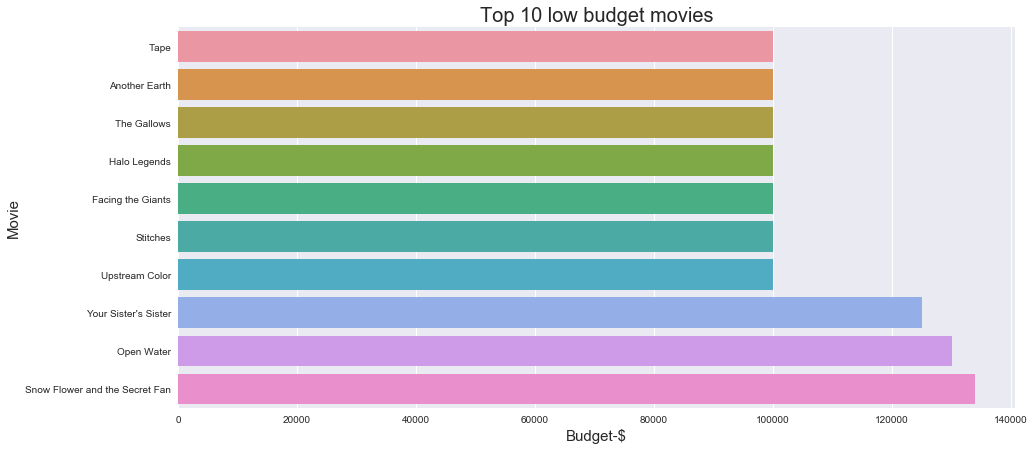

In [141]:
# sorting the data in the ascending order of the 'budget' column and selecting the first 10
df5 = df.sort_values(by='budget',ascending=True)[:10]

# taking the information for plotting
value_x = df5['budget']
value_y = df5['original_title']

# calling the function 'plot_fun' to make a bar plot
plot_fun(low_budget_movies_plot1,value_x,value_y,'Top 10 low budget movies','Budget-$','Movie','darkgrid',15,7,20,15,15)

#### Findings from the plot: From the above point plot, we can see the top 10 movies which are made with low budget and there are 7 movies made with the budget of 100000 each.

### Research Question 3: What is the average runtime of the movie each year?

Max average runtime = 167.600  Min average runtime =  103.304


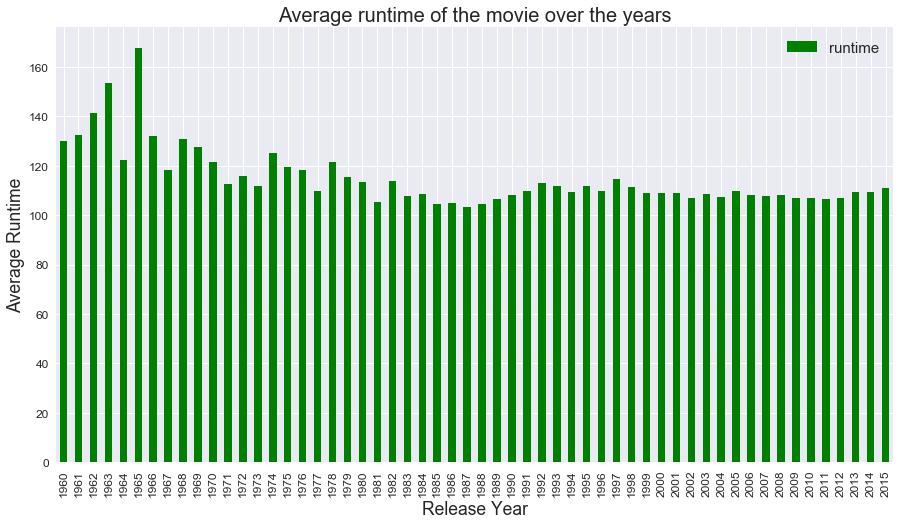

In [142]:
# calculating the average runtime of the movie each year using 'groupby' function and plotting the data
df.groupby('release_year').runtime.mean().plot(kind = 'bar', color = 'g', figsize = (15,8), fontsize = 15)
plt.xlabel('Release Year', fontsize =17.5)
plt.ylabel('Average Runtime', fontsize =17.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 15)
plt.title('Average runtime of the movie over the years', fontsize =20)

#getting the max and min of average runtime
df_temp = df.groupby('release_year').runtime.mean()
var_max=format(df_temp.max(),".3f")
var_min=format(df_temp.min(),".3f")
print ('Max average runtime =' ,var_max,' Min average runtime = ',var_min)

#### Findings from the plot: From the above bar plot, we can see that the average runtime of the movie is varying much in the recent years

### Research Question 4: What is the total vote counts each year? 

Max of total vote counts in a year = 182576.000  Min of total vote counts in a year =  226.000


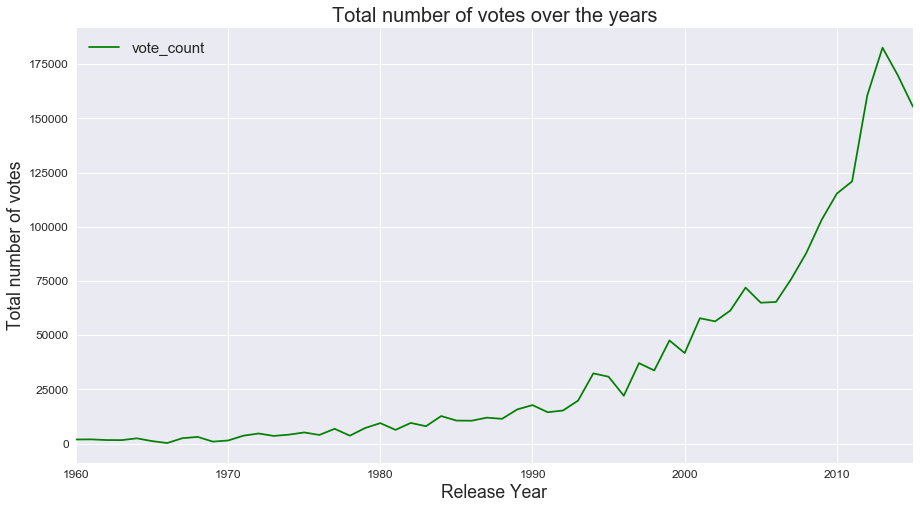

In [143]:
# calculating the total vote counts for each year using 'groupby' function and plotting the data

df.groupby('release_year').vote_count.sum().plot(kind='line',  color = 'g', figsize = (15,8), fontsize = 15 )

plt.xlabel('Release Year', fontsize =17.5)
plt.ylabel('Total number of votes', fontsize =17.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 15)
plt.title('Total number of votes over the years', fontsize =20)

#getting the max and min of total vote counts
df_temp = df.groupby('release_year').vote_count.sum()
var_max=format(df_temp.max(),".3f")
var_min=format(df_temp.min(),".3f")
print ('Max of total vote counts in a year =' ,var_max,' Min of total vote counts in a year = ',var_min)

#### Findings from the plot: From the above line plot, we can see that the total number of votes are increasing every year, the increase rate is high in the recent years (with the exception of the last couple of years)

### Research Question 5: What is Average vote rating each year? 

Max of average vote rating in a year = 7.400  Min of average vote rating in a year =  5.972


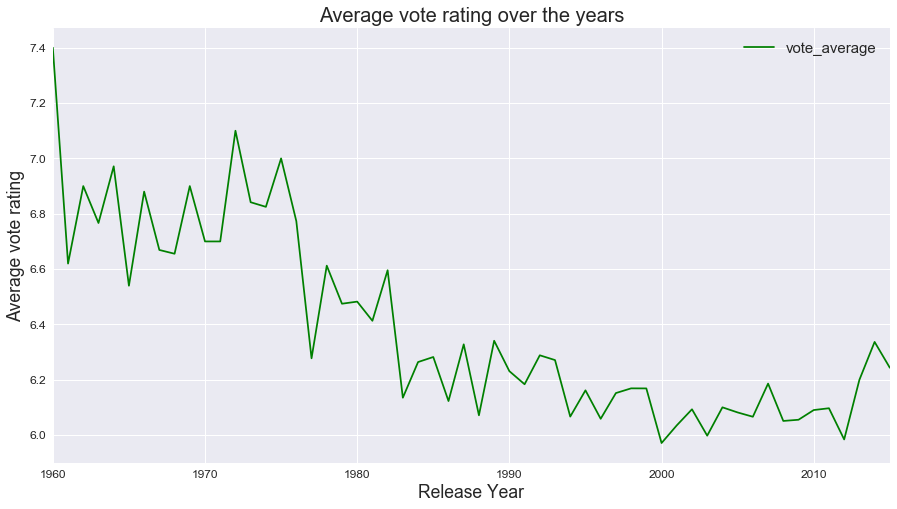

In [144]:
# calculating the average vote rating for each year using 'groupby' function and plotting the data

df.groupby('release_year').vote_average.mean().plot(kind='line',  color = 'g', figsize = (15,8), fontsize = 15 )

plt.xlabel('Release Year', fontsize =17.5)
plt.ylabel('Average vote rating', fontsize =17.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 15)
plt.title('Average vote rating over the years', fontsize =20)

#getting the max and min of average vote rating
df_temp = df.groupby('release_year').vote_average.mean()
var_max=format(df_temp.max(),".3f")
var_min=format(df_temp.min(),".3f")
print ('Max of average vote rating in a year =' ,var_max,' Min of average vote rating in a year = ',var_min)

#### Findings from the plot: From the above line plot, we can see that the average voting is reducing over the years

   ### Research Question 6: How does the profit depends on Popularity, Budget, Runtime and Vote avarage?

Correlation Between Popularity and Profit/Loss :  0.596
Correlation Between Budget and Profit/Loss :  0.526
Correlation Between Runtime and Profit/Loss :  0.220
Correlation Between Vote_average and Profit/Loss :  0.261


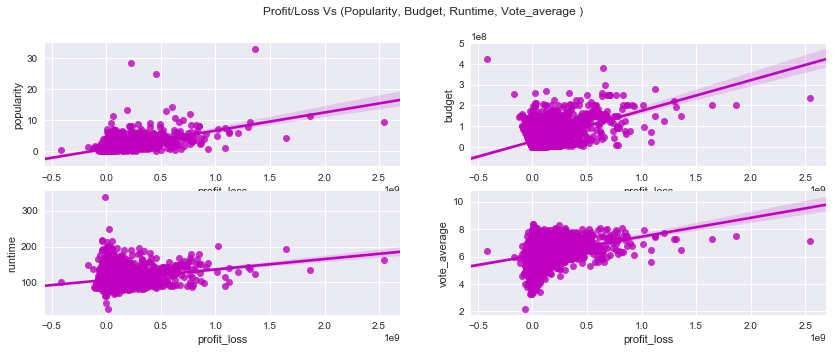

In [145]:
# Plotting the scatter plots between Profit/Loss Vs Popularity, Budget, Runtime, Vote_average to see a relation between them

profit_variables, axs = plt.subplots(2,2,figsize = (14,5))
profit_variables.suptitle("Profit/Loss Vs (Popularity, Budget, Runtime, Vote_average )",fontsize=12)

sns.regplot(x=df['profit_loss'],y=df['popularity'],color='m',ax=axs[0][0])
sns.regplot(x=df['profit_loss'],y=df['budget'],color='m',ax=axs[0][1])
sns.regplot(x=df['profit_loss'],y=df['runtime'],color='m',ax=axs[1][0])
sns.regplot(x=df['profit_loss'],y=df['vote_average'],color='m',ax=axs[1][1])

sns.set_style("darkgrid")

# calculating a pairwise correlation Profit/Loss Vs Popularity, Budget, Runtime, Vote_average between and priting them
data_corr = df.corr()

print("Correlation Between Popularity and Profit/Loss : ",format(data_corr.loc['popularity','profit_loss'],".3f"))
print("Correlation Between Budget and Profit/Loss : ",format(data_corr.loc['budget','profit_loss'],".3f"))
print("Correlation Between Runtime and Profit/Loss : ",format(data_corr.loc['runtime','profit_loss'],".3f"))
print("Correlation Between Vote_average and Profit/Loss : ",format(data_corr.loc['vote_average','profit_loss'],".3f"))


#### Findings from the plot: From the above bar plot, it can be noted that the profit is influenced by the parameters popularity, budget, but not much dependent on the runtime, vote_average

### Research Question 7: Which Genre has the highest movies?

Drama              1737
Comedy             1342
Thriller           1193
Action             1075
Adventure           746
Romance             659
Crime               649
Science Fiction     515
Horror              455
Family              423
Fantasy             392
Mystery             341
Animation           200
Music               134
History             129
War                 119
Western              52
Documentary          30
Foreign              13
TV Movie              1
dtype: int64


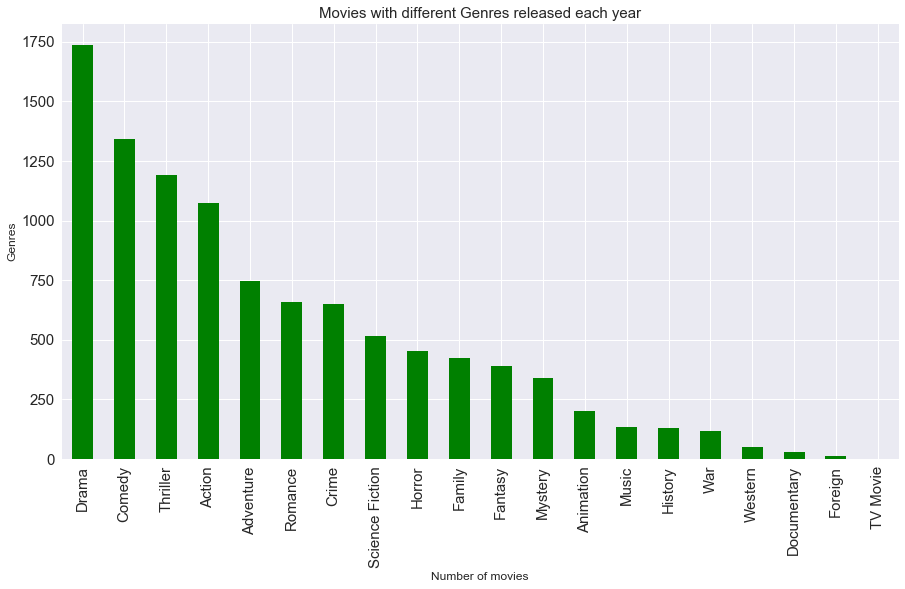

In [146]:
# cacluating how many movies are released in each genre and plotting them
# the 'genres' column in the data set has multiple geners for some movies seperated by '|'

# so, first all the data in the 'genres' column concatenated
genres_cat = df[('genres')].str.cat(sep = '|')

# then this is split using the charecter '|'
genres_split = pd.Series(genres_cat.split('|'))

# value counts for each genre calculated
movies_genres = genres_split.value_counts()

#plotting the genre vs number of movies
movies_genres.plot(kind= 'bar',color = 'g', figsize = (15,8), fontsize = 15)
plt.title("Movies with different Genres released each year",fontsize=15)
plt.xlabel('Number of movies',fontsize=12)
plt.ylabel("Genres",fontsize= 12)
sns.set_style("darkgrid")

print (movies_genres)

<a id='conclusions'></a>
## Conclusions

1) Movie 'Avatar' has made highest profit. The movie that has mde highest loss is 'The warrior's way'
<br>
2) The movuie made with highest budget is 'The warrior's way', there are 7 movies made with lowest budget 'Tape', 'Another 
<br>
earth', 'The Gallows', 'Halo legends', 'Facing the giants', 'Stiches', Upstream color'
<br>
3) The average runtime of the movie every year varies from 103.304 to 167.6 and is not varying significantly since year 1999
<br>
4) The total votes received in a year varies from 226 to 182576 and is increasing every year with a slight exception of very
<br>
recent years
<br>
5) The average vote rating every year varies from 5.972 to 7.4 and is reducing every year with a slight exception of very recent
<br>
years
<br>
6) The profit made depends on the parameters Popularity, Budget, Runtime and vote average. It shows that the movies with
<br>
incrased popularity and budget made good profits and the movies with increased runtime and vote average has not made good
<br>
profits.
<br>
7) High number of movies (1737 movies) made in the 'Drama' genre and less number of movies (1 movie) made in the in the 'TV
<br>
Movie' genre.
<br>

## Limitations
There are many columns with missing data and this will affect the accuracy of the analysis. From the
data selected for the analysis, there are 23 columns where the genre is not mentioned and 30 movies
with runtime of 0 and 5793 movies with budget less than 100000. I have removed these columns for the
analysis and this has reduced the sample size (the raw data has 10866 columns and the data considered
for the analysis has 3812 columns). There are some movie with revenue significantly less than the
budget, this is an unlikely situation, and however I have considered this data as it is, assuming that
these movies have made loss.